## DROPOUT APPLICATION

In this activity you will be experimenting with dropout. Below, a binary classification task is implemented: the dataset and a sequential NN model is given (when you run the code data will be plotted together with decision boundaries learned by the model).

**TASK 1:**
As you will see in the figure, the model performance is not great. We would like to experiment with the dropout technique to improve model performance. Experiment with different values of dropout and explain your observations.

The test accuracy is printed at the right bottom of the figure. Which models have better performance, models trained with or without dropout technique?

[Original resource](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) written by Issam H. Laradji

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
import tensorflow as tf
import numpy as np
import random
import os

# Set the random seed values
seed_value = 0

# 1. Set the `PYTHONHASHSEED` environment variable
os.environ['PYTHONHASHSEED'] = str(seed_value)

# 2. Set the Python built-in random seed
random.seed(seed_value)

# 3. Set the NumPy random seed
np.random.seed(seed_value)

# 4. Set the TensorFlow random seed
tf.random.set_seed(seed_value)

# Now, when you define and compile your Keras model, TensorFlow will use this seed for weight initialization and other randomness


In [ ]:
# Creating the dataset
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=seed_value, n_clusters_per_class=1
)
rng = np.random.RandomState(seed_value)
X += 2 * rng.uniform(size=X.shape)

In [ ]:
# Regularization parameter set to zero,
# experiment with a list of different values
dropout_vals = [0,0.25,0.4,0.5,0.75,0.9]

In [ ]:
# Define the model
def create_seq_model(dropout_val):
  model = Sequential()

  # Adding the input layer and the first hidden layer with dropout
  model.add(Dense(units=20, activation='relu', input_shape=(2,)))  # 2 features as input
  model.add(Dropout(dropout_val))  # Applying dropout with a rate of 10%

  # Adding the second hidden layer with dropout
  model.add(Dense(units=20, activation='relu'))
  model.add(Dropout(dropout_val))  # Applying dropout with a rate of 10%

  # Adding the third hidden layer with dropout
  model.add(Dense(units=20, activation='relu'))
  model.add(Dropout(dropout_val))  # Applying dropout with a rate of 10%

  # Adding the output layer
  model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

  # Compiling the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model



The next cell defines a list of classifiers using the list of alpha values you have picked

In [ ]:
classifiers = []
names = []
for dropout_val in dropout_vals:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            # definition of the classifier
            create_seq_model(dropout_val),
        )
    )
    names.append(f"dropout {dropout_val:.2f}")

Training models on data, plotting decision boundaries

596/596 [==============================] - 1s 1ms/step


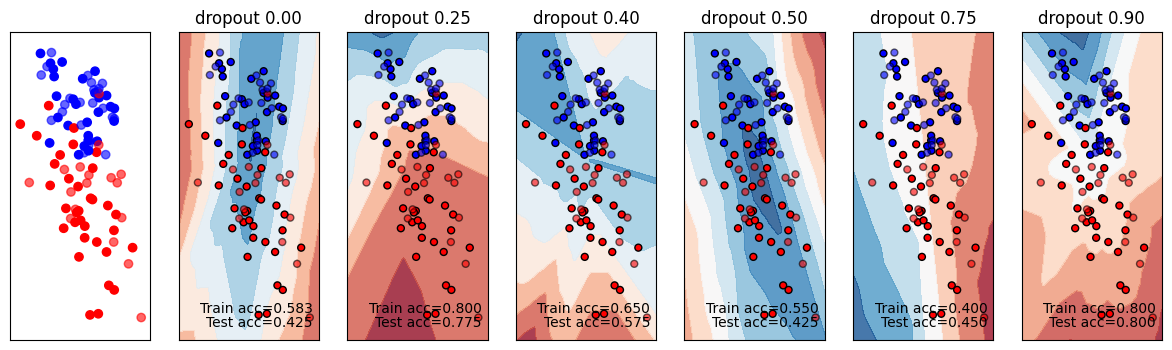

In [ ]:
figure = plt.figure(figsize=(12, 4))
i = 1

# split into training and test part
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=seed_value
)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.05  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(1, len(classifiers) + 1, i)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)

    #Test accuracy
    y_pred = clf.predict(X_test)
    y_pred = (y_pred.ravel() > 0.5).astype('int64')
    test_acc = (y_pred==y_test).sum()/y_test.shape[0]

    #Train accuracy
    y_pred = clf.predict(X_train)
    y_pred = (y_pred.ravel() > 0.5).astype('int64')
    train_acc = (y_pred==y_train).sum()/y_train.shape[0]

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max] x [y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
    else:
        Z = clf.predict(np.column_stack([xx.ravel(), yy.ravel()]))

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

    # Plot also the training points
    ax.scatter(
        X_train[:, 0],
        X_train[:, 1],
        c=y_train,
        cmap=cm_bright,
        edgecolors="black",
        s=25,
    )
    # and testing points
    ax.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap=cm_bright,
        alpha=0.6,
        edgecolors="black",
        s=25,
    )

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(
        xx.max() - 0.3,
        yy.min() + 0.3,
        f"Test acc={test_acc:.3f}".lstrip("0"),
        size=10,
        horizontalalignment="right",
    )
    ax.text(
        xx.max() - 0.3,
        yy.min() + 0.6,
        f"Train acc={train_acc:.3f}".lstrip("0"),
        size=10,
        horizontalalignment="right",
    )
    i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

**Task 1 Comments:** Without dropout, the accuracy on train data and test data are low. This indicates high bias. Explain your observations after experiemnting with adding dropout.

**Task 2:**
Read the Dropout and Batch Normalization tutorial here:
https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/tutorial

The exercises below are created by the same authors (see link at the end of that tutorial) and edited by Baris Bozkurt

**Task 3:** Below a machine learning experiment is given. Try improving the model by adding dropout after each layer. Experiment with different values and try to get your best.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'
spotify = pd.read_csv(url)
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


**Task 3a:** Shortly explain the operations performed in the next cell. What is the target variable? What are the operations performed on the features?

**Answer 3a:** Write your answer here


In [ ]:
from sklearn.model_selection import GroupShuffleSplit

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


**Task 3b:** A model and code for training is given. Run the cell and try to improve the model by adding dropout.

Minimum Validation Loss: 0.1932


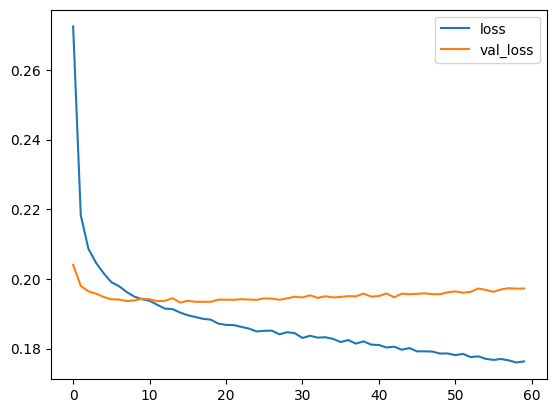

In [ ]:
# You should modify the model below to improve it using dropout
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=60,
    verbose=0,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

**Answer 3b:** Write your comments here. Summarize your findings after your experimentation with dropout

## BATCH NORMALIZATION APPLICATION

**Task 4:**
Run the code cells below to download the dataset, define a model and train it. You will see that the model will have trouble learning.

Try to sol solve the problem via modifying the model to incorporate batch normalization.

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets
X_train, X_valid, y_train, y_valid = train_test_split(X.values, y.values.ravel(), test_size=0.2, random_state=42)

input_shape = [X_train.shape[1]]

Minimum Validation Loss: 4.4189


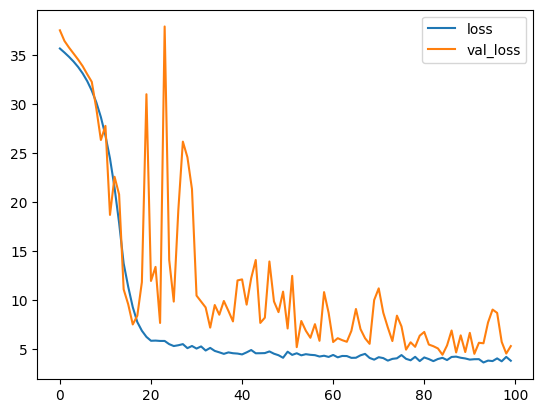

In [ ]:
# Modify the model below
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

model.compile(
    optimizer='sgd', # SGD is more sensitive to differences of scale
    loss='mae',
    metrics=['mae'],
)
history = model.fit(
    X_train, y_train.ravel(),
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=100,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))


**Task 4 comments:** Explain your results and share your observations here

**Finished earlier than other groups:**
Check out similar examples on this page:
https://wandb.ai/authors/ayusht/reports/Batch-Normalization-in-Keras-An-Example--VmlldzoxNzI5NjQ
